### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import itertools

- %matplotlib inline, any Matplotlib plots that we create in any future cells in the notebook will also be displayed and store within the notebook.

- warnings : filter out warnings

### Import Data

In [2]:
application_data = pd.read_csv('application_data.csv')

### Data Dimensions

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
display("application_data")
display(application_data.head(3))

'application_data'

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.083037      0.262949      0.139376          0.0247            0.0369   
1      0.311267      0.622246           NaN          0.0959            0.0529   
2           NaN      0.555912      0.729567             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                       0.9722           0.6192          0.0143   
1                       0.9851           0.7960          0.0605   
2                          NaN              NaN             NaN   

   ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0     

In [4]:
application_data.shape

(307511, 122)

In [5]:
application_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [6]:
application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [7]:
application_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [8]:
round(100*(application_data.isnull().sum()/len(application_data.index)),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

### Drop columns

Drop columns with missing values more than 40%

In [9]:
application_data=application_data.drop([ 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE","OCCUPATION_TYPE"],axis=1)

In [10]:
application_data.shape

(307511, 70)

In [11]:
print(type(application_data.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 70 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [12]:
round(100*(application_data.isnull().sum()/len(application_data.index)),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

In [13]:
application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  \
count      307511.000000    307511.000000  307511.000000   307511.000000   
mean        -4986.120328     -2994.202373       0.999997        0.819889   
std          3522.886321      1509.450419       0.001803        0.384280   
min        -24672.000000     -7197.000000       0.000000        0.000000   
25%         -7479.500000     -4299.000000       1.000000        1.000000   
50%         -4504.000000     -3254.000000       1.000000        1.000000   
75%         -2010.000000     -1720.000000       1.000000        1.000000   
max             0.000000         0.000000       1.000000        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    307511.000000     307511.000000  307511.000000  307511.000000   
mean          0.199368          0.998133       0.281066       0.056720   
std           0.399526          0.043164       0.449521       0.231307   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    307509.000000         307511.000000                307511.000000   
mean          2.152665              2.052463                     2.031521   
std           0.910682              0.509034                     0.502737   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.26583

### Missing values
- AMT_REQ_CREDIT_BUREAU_HOUR     13.50
- AMT_REQ_CREDIT_BUREAU_DAY      13.50
- AMT_REQ_CREDIT_BUREAU_WEEK     13.50
- AMT_REQ_CREDIT_BUREAU_MON      13.50
- AMT_REQ_CREDIT_BUREAU_QRT      13.50
- AMT_REQ_CREDIT_BUREAU_YEAR     13.50
- NAME_TYPE_SUITE                 0.42
- OBS_30_CNT_SOCIAL_CIRCLE        0.33
- DEF_30_CNT_SOCIAL_CIRCLE        0.33
- OBS_60_CNT_SOCIAL_CIRCLE        0.33
- DEF_60_CNT_SOCIAL_CIRCLE        0.33
- AMT_GOODS_PRICE                 0.09

check each columns' normal distribution (describe()) to decide whether to eliminate the outliers or not

In [14]:
application_data = application_data.replace(np.nan, 0)

In [15]:
print(type(application_data.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 70 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

### Convert negative values to absolute values
such as DAYS_BIRTH

In [16]:
application_data['DAYS_BIRTH'] = abs(application_data['DAYS_BIRTH'])
application_data['DAYS_ID_PUBLISH'] = abs(application_data['DAYS_ID_PUBLISH'])
application_data['DAYS_ID_PUBLISH'] = abs(application_data['DAYS_ID_PUBLISH'])
application_data['DAYS_LAST_PHONE_CHANGE'] = abs(application_data['DAYS_LAST_PHONE_CHANGE'])

In [17]:
display("application_data")
display(application_data.head())

'application_data'

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461           -637            -3648.0   
1                    0.003541       16765          -1188            -1186.0   
2                    0.010032       19046           -225            -4260.0   
3                    0.008019       19005          -3039            -9833.0   
4                    0.028663       19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           1           0              2.0   
2                 1           1           0              1.0   
3                 1           0           0              2.0   
4                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_

### Visualisation for Gender

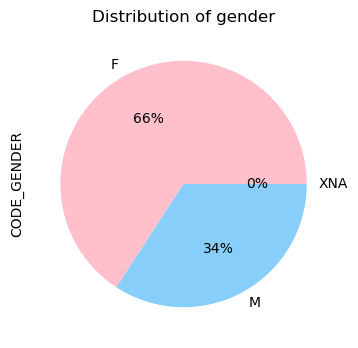

In [18]:
fig = plt.figure(figsize=(10,4))
plt.subplot(121)
application_data["CODE_GENDER"].value_counts().plot.pie(autopct="%1.0f%%", colors = ["pink","lightskyblue"])
plt.title("Distribution of gender")
plt.show()

### Number of Defaulters vs Transactors

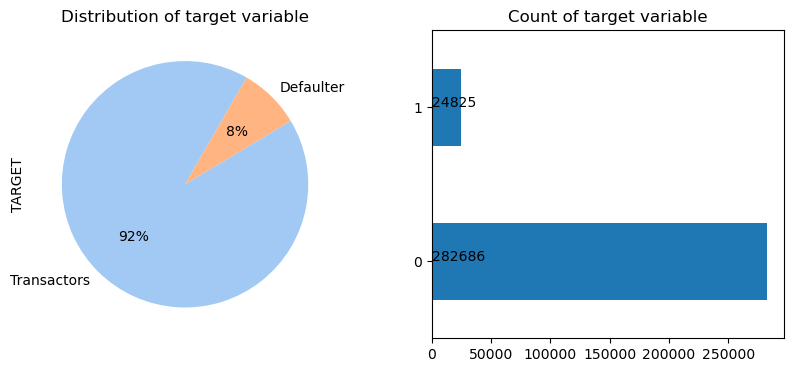

In [19]:
plt.figure(figsize=(10,4))
plt.subplot(121)
application_data["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("pastel",7),startangle = 60,labels=["Transactors","Defaulter"])
plt.title("Distribution of target variable")

plt.subplot(122)
ax = application_data["TARGET"].value_counts().plot(kind="barh")

for i,j in enumerate(application_data["TARGET"].value_counts().values):
    ax.text(.7,i,j,fontsize=10)

plt.title("Count of target variable")
plt.show()

### Contract Types

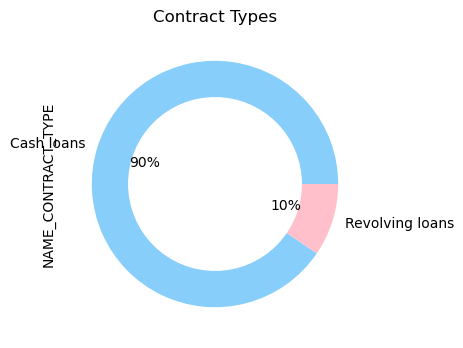

In [20]:
plt.figure(figsize=(10,4))
plt.subplot(121)
application_data["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["lightskyblue","pink"])
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Contract Types")


plt.show()

### Contract type by gender

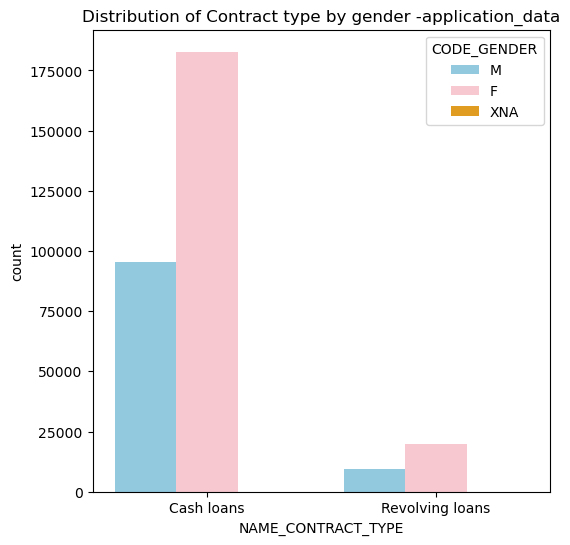

In [21]:
fig  = plt.figure(figsize=(13,6))
plt.subplot(121)
ax = sns.countplot(x = "NAME_CONTRACT_TYPE", hue="CODE_GENDER", data = application_data ,palette=["skyblue", "pink", "orange"])
ax.set_facecolor("white")
ax.set_title("Distribution of Contract type by gender -application_data")


plt.show()

### Applicants owning a car and by gender

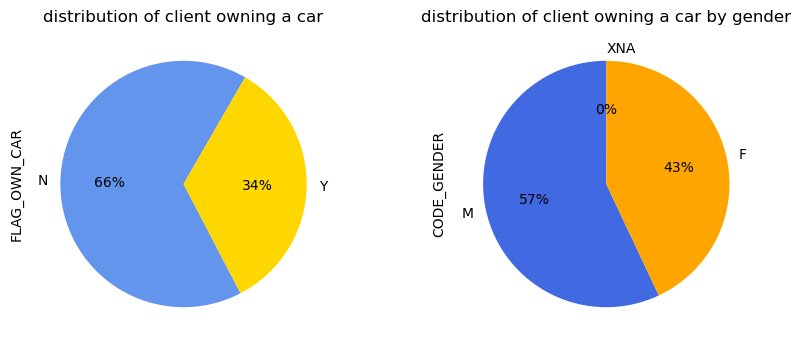

In [22]:
fig = plt.figure(figsize=(10,4))

plt.subplot(121)
application_data["FLAG_OWN_CAR"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["cornflowerblue","gold"],startangle = 60)
plt.title("distribution of client owning a car")

plt.subplot(122)
application_data[application_data["FLAG_OWN_CAR"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["royalblue","orange"],startangle = 90)
plt.title("distribution of client owning a car by gender")

plt.show()

### Applicants owning a house or flat and by gender

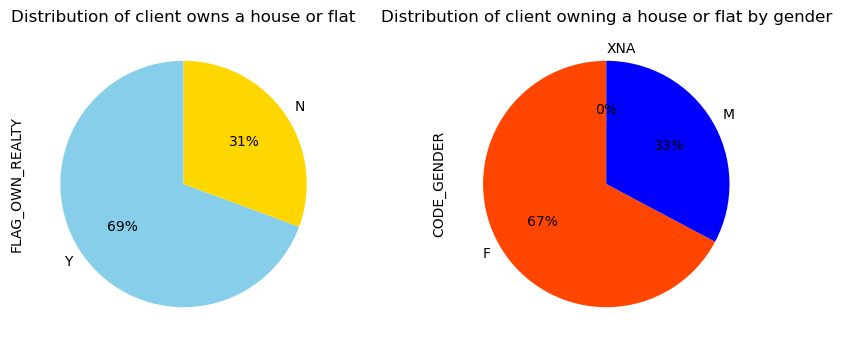

In [23]:
plt.figure(figsize=(10,4))
plt.subplot(121)
application_data["FLAG_OWN_REALTY"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["skyblue","gold"],startangle = 90)
plt.title("Distribution of client owns a house or flat")

plt.subplot(122)
application_data[application_data["FLAG_OWN_REALTY"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["orangered","b"],startangle = 90)
plt.title("Distribution of client owning a house or flat by gender")
plt.show()

### Number of children and family members of Applicants

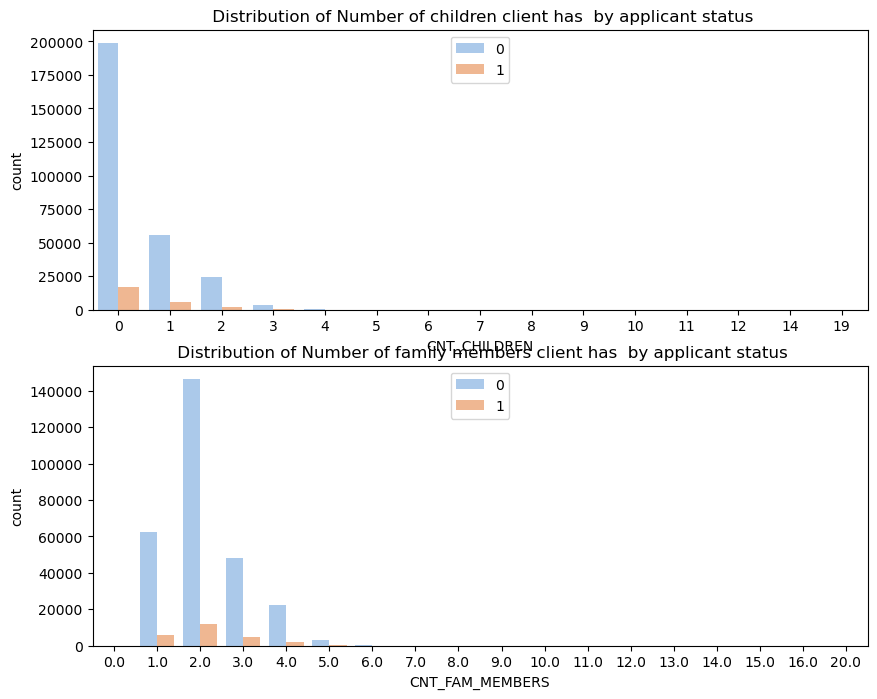

In [54]:
fig = plt.figure(figsize=(10,8))
plt.subplot(211)
sns.countplot(x = application_data["CNT_CHILDREN"],palette="pastel",hue=application_data["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of children client has  by applicant status")
plt.subplot(212)
sns.countplot(x = application_data["CNT_FAM_MEMBERS"],palette="pastel",hue=application_data["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of family members client has  by applicant status")
fig.set_facecolor("White")

### Compare data by separate Defaulter and Transactor

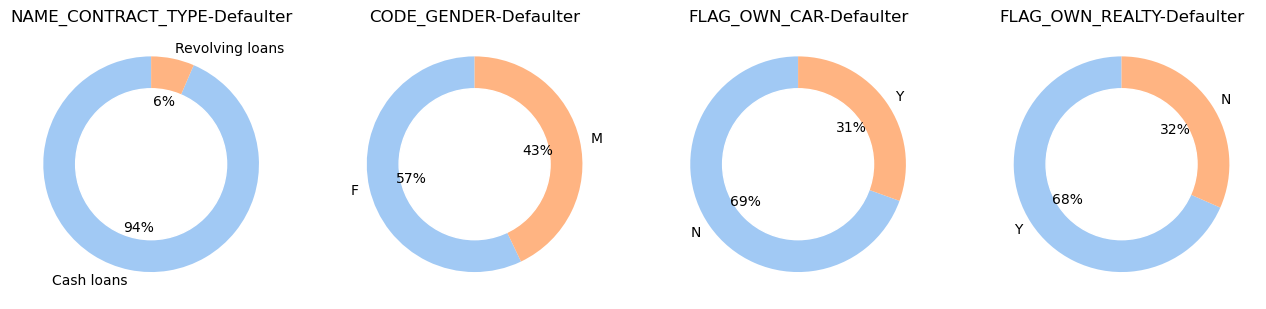

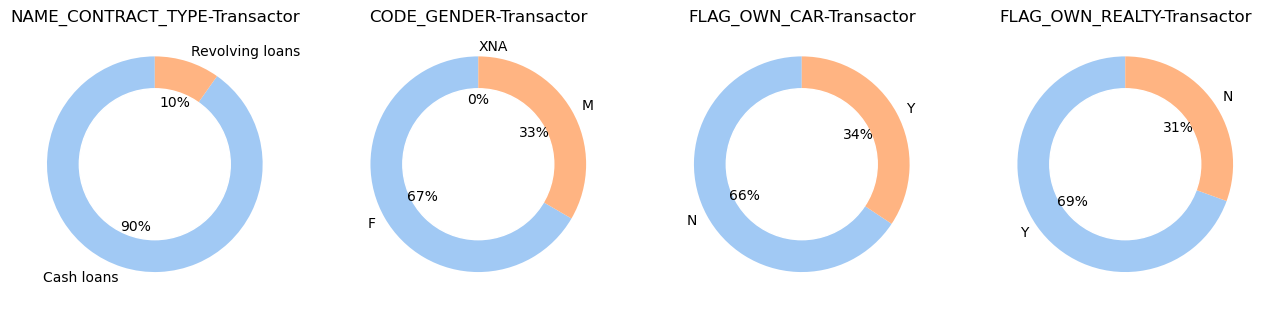

In [25]:
Defaulter = application_data[application_data["TARGET"]==1][[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]
Transactor = application_data[application_data["TARGET"]==0][[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]

d_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
d_length = len(d_cols)

fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    Defaulter[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("pastel"),startangle = 90)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Defaulter")


fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    Transactor[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("pastel",3),startangle = 90)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Transactor")

### Scatter plot between credit amount and annuity amount

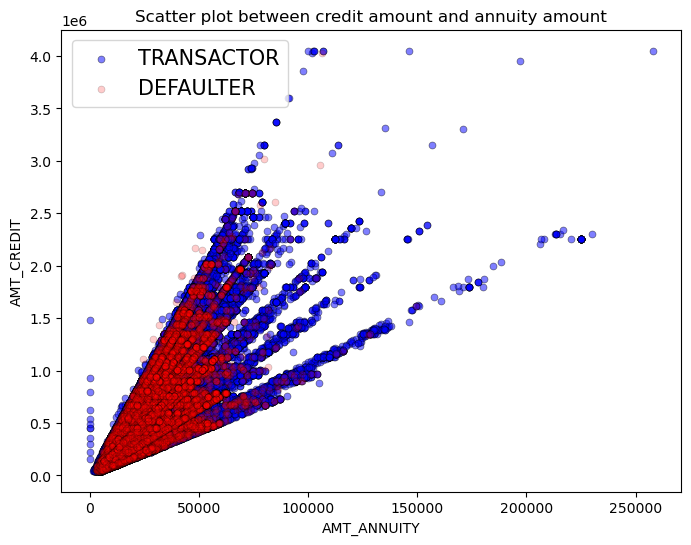

In [26]:
fig = plt.figure(figsize=(8,6))
plt.scatter(application_data[application_data["TARGET"]==0]['AMT_ANNUITY'],application_data[application_data["TARGET"]==0]['AMT_CREDIT'],s=25,
            color="b",alpha=.5,label="TRANSACTOR",linewidth=.5,edgecolor="k")
plt.scatter(application_data[application_data["TARGET"]==1]['AMT_ANNUITY'],application_data[application_data["TARGET"]==1]['AMT_CREDIT'],s=25,
            color="r",alpha=.2,label="DEFAULTER",linewidth=.5,edgecolor="k")
plt.legend(loc="best",prop={"size":15})
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_CREDIT")
plt.title("Scatter plot between credit amount and annuity amount")
plt.show()

### Applicant's Income

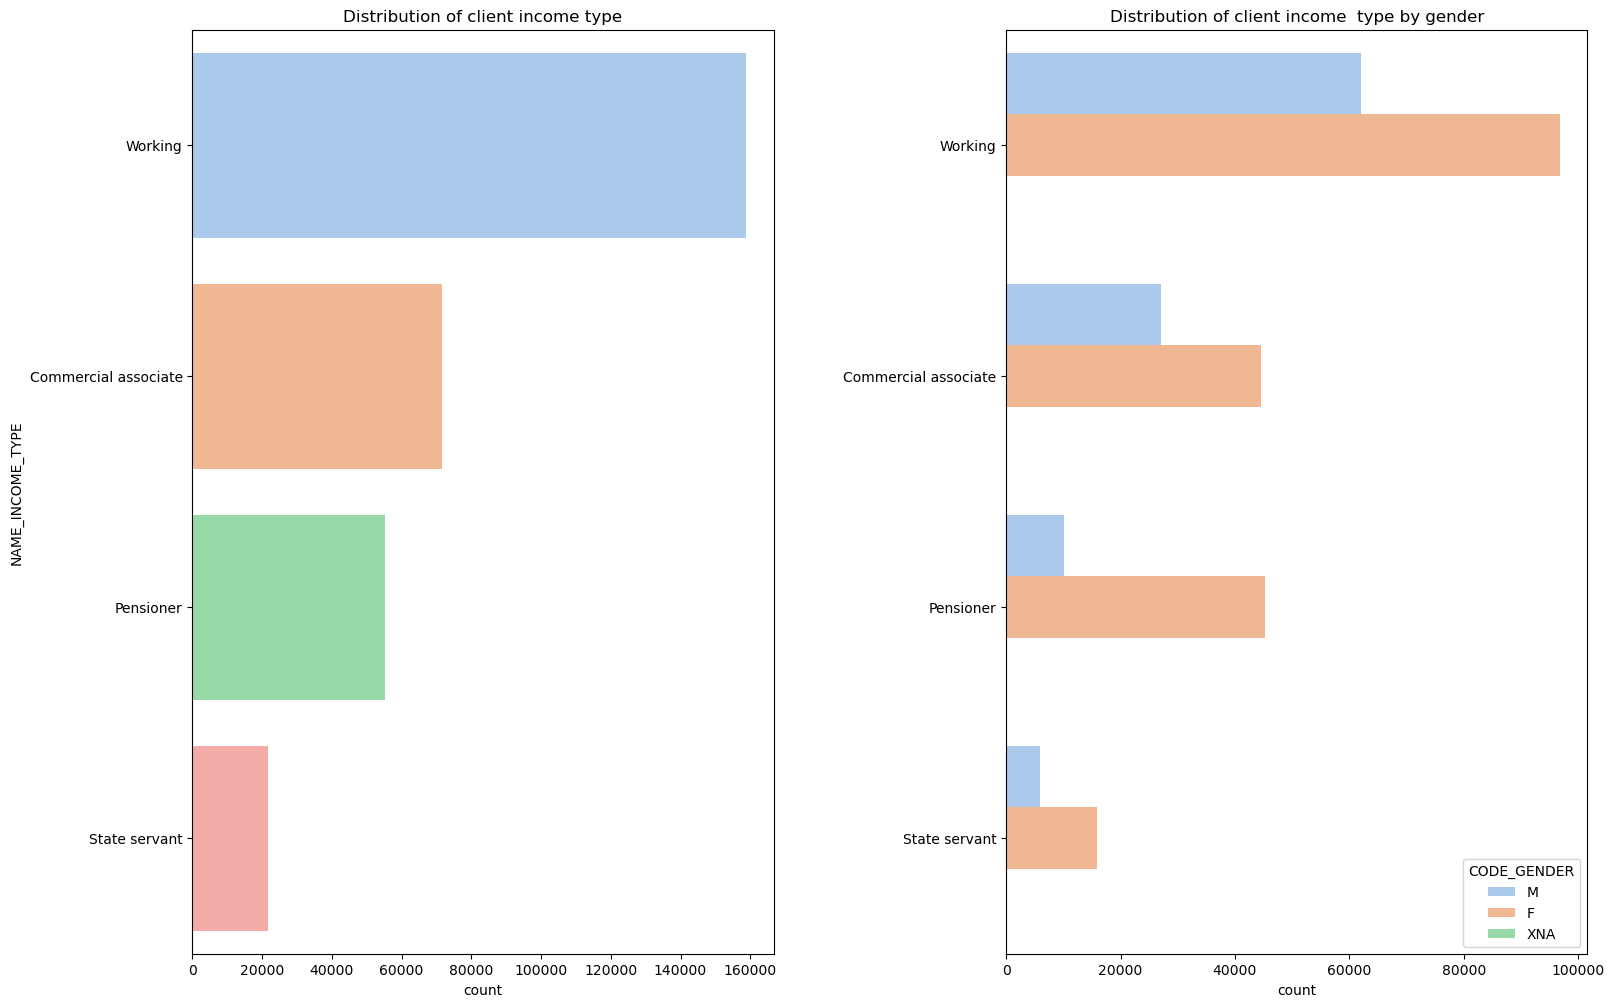

In [27]:
plt.figure(figsize=(18,12))
plt.subplot(121)
sns.countplot(y=application_data["NAME_INCOME_TYPE"],
              palette="pastel",
              order=application_data["NAME_INCOME_TYPE"].value_counts().index[:4])
plt.title("Distribution of client income type")

plt.subplot(122)
sns.countplot(y=application_data["NAME_INCOME_TYPE"],
              hue=application_data["CODE_GENDER"],
              palette="pastel",
              order=application_data["NAME_INCOME_TYPE"].value_counts().index[:4])
plt.ylabel("")
plt.title("Distribution of client income  type by gender")
plt.subplots_adjust(wspace = .4)

### Education level of Applicant

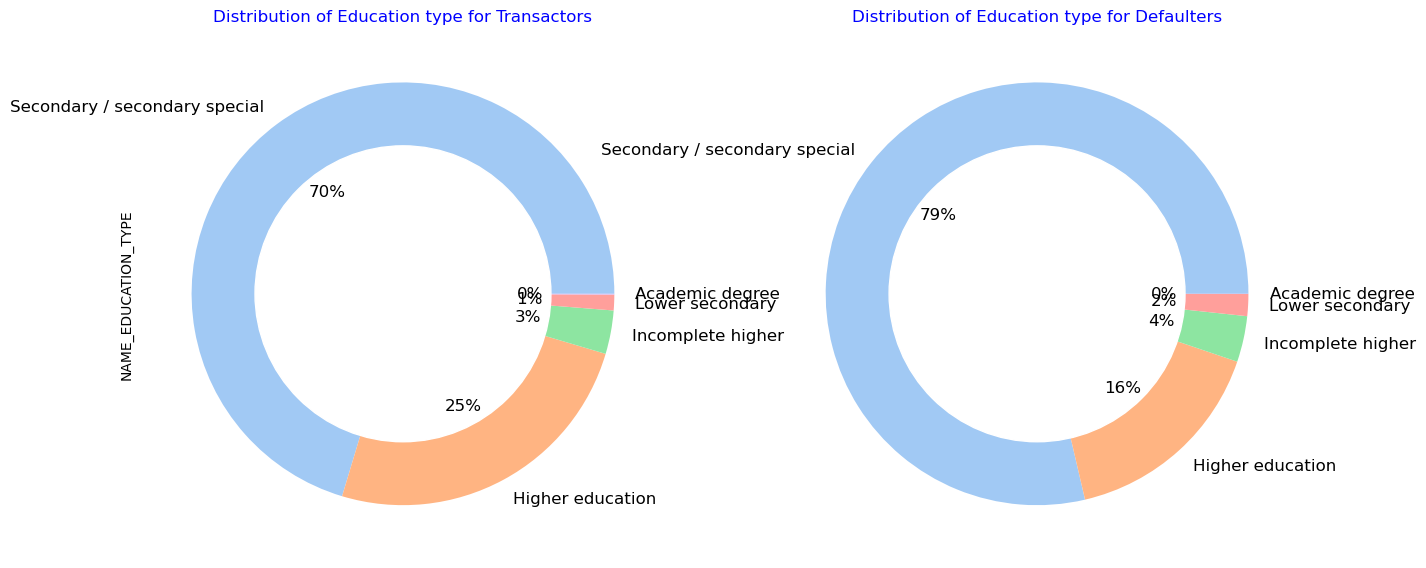

In [28]:
plt.figure(figsize=(15,15))
plt.subplot(121)
application_data[application_data["TARGET"]==0]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12,autopct = "%1.0f%%",
                                                                                                 colors = sns.color_palette("pastel"))
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Distribution of Education type for Transactors",color="b")

plt.subplot(122)
application_data[application_data["TARGET"]==1]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12,autopct = "%1.0f%%",
                                                                                                 colors = sns.color_palette("pastel"))
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Distribution of Education type for Defaulters",color="b")
plt.ylabel("")
plt.show()

### Family status of Applicants

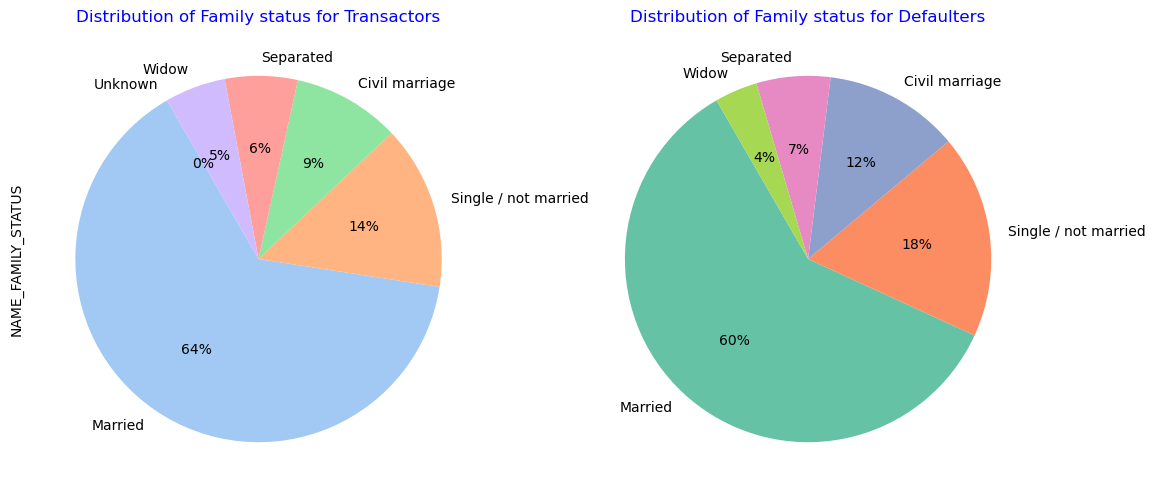

In [29]:
plt.figure(figsize=(13,8))
plt.subplot(121)
application_data[application_data["TARGET"]==0]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                             startangle=120,colors = sns.color_palette("pastel",7))
plt.title("Distribution of Family status for Transactors",color="b")

plt.subplot(122)
application_data[application_data["TARGET"]==1]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                    startangle=120,colors = sns.color_palette("Set2",7))

plt.title("Distribution of Family status for Defaulters",color="b")
plt.ylabel("")
plt.show()

### Applicant's age

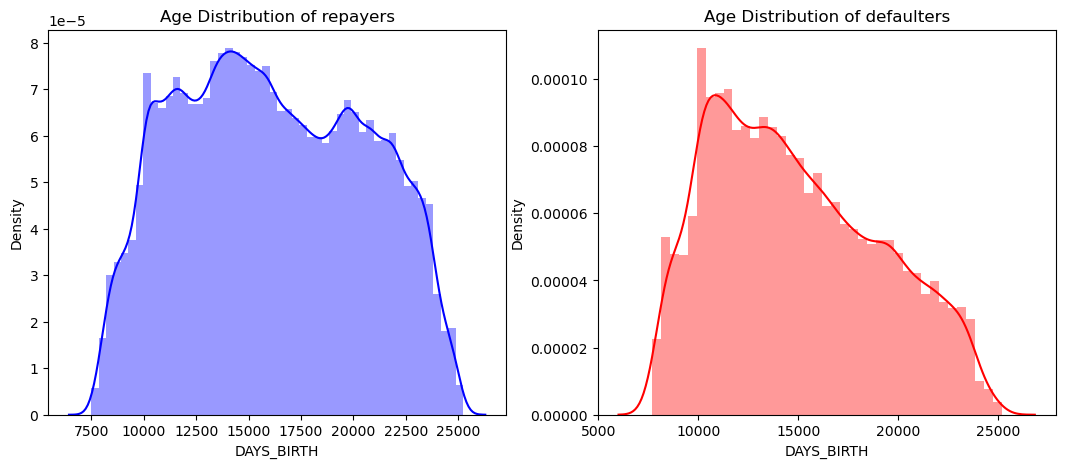

In [30]:
fig = plt.figure(figsize=(13,5))

plt.subplot(121)
sns.distplot(application_data[application_data["TARGET"]==0]["DAYS_BIRTH"],color="b")
plt.title("Age Distribution of repayers")

plt.subplot(122)
sns.distplot(application_data[application_data["TARGET"]==1]["DAYS_BIRTH"],color="r")
plt.title("Age Distribution of defaulters")


fig.set_facecolor("white")

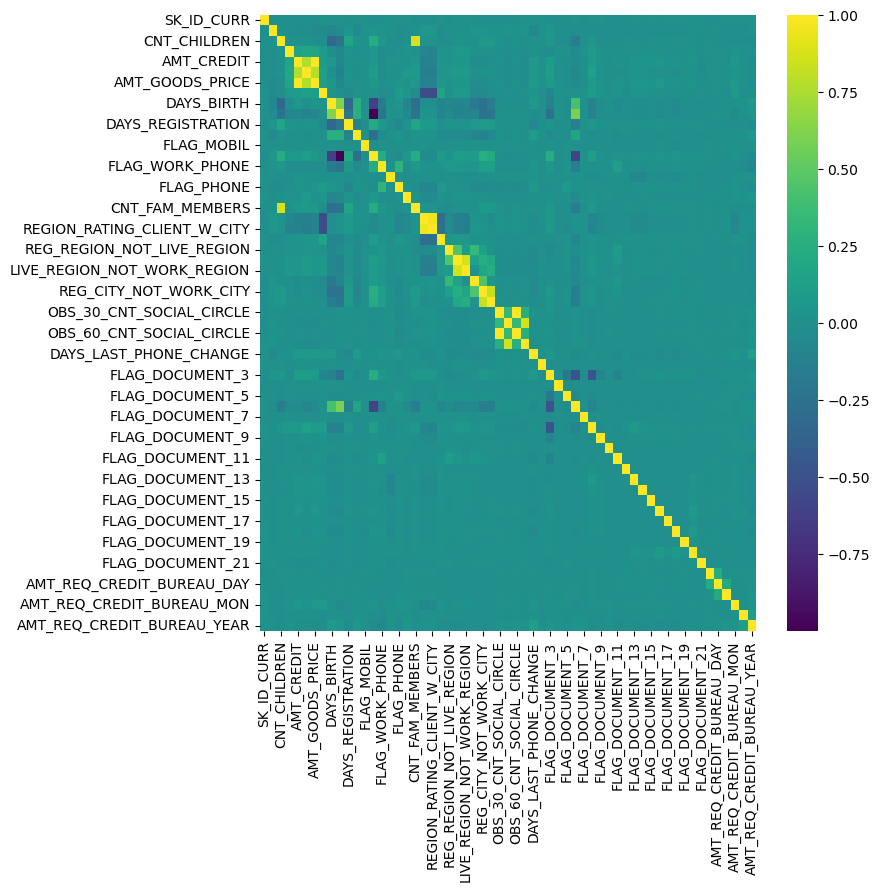

In [31]:
corrmat = application_data.corr() 
  
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="viridis") #try instead viridis / coolwarm
plt.show()

In [32]:
df_transactor = application_data[application_data['TARGET'] == 0]
df_defaulter = application_data[application_data['TARGET'] == 1]

In [33]:
corrmat = df_transactor.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

Var1                        Var2  Correlation
1798     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE         1.00
776                FLAG_EMP_PHONE               DAYS_EMPLOYED         1.00
358               AMT_GOODS_PRICE                  AMT_CREDIT         0.99
1199  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT         0.95
1064              CNT_FAM_MEMBERS                CNT_CHILDREN         0.88
1439  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION         0.86
1858     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE         0.86
1619      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.83
359               AMT_GOODS_PRICE                 AMT_ANNUITY         0.78
299                   AMT_ANNUITY                  AMT_CREDIT         0.77

In [34]:
corrmat = df_defaulter.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

Var1                        Var2  Correlation
1798     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE         1.00
776                FLAG_EMP_PHONE               DAYS_EMPLOYED         1.00
358               AMT_GOODS_PRICE                  AMT_CREDIT         0.98
1199  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT         0.96
1064              CNT_FAM_MEMBERS                CNT_CHILDREN         0.89
1858     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE         0.87
1439  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION         0.85
1619      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.78
359               AMT_GOODS_PRICE                 AMT_ANNUITY         0.75
299                   AMT_ANNUITY                  AMT_CREDIT         0.75

### Split Data and Train Model

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report

In [36]:
# Encoding the data - Before training the model, we need to make sure the data is in a form that the model can understand
# Use Label Encoder for all features with 2 classes
le = LabelEncoder()
for x in [i for i in application_data.columns if len(application_data[i].unique())==2]:
    print(x, application_data[x].unique())
    application_data[x]= le.fit_transform(application_data[x])

TARGET [1 0]
NAME_CONTRACT_TYPE ['Cash loans' 'Revolving loans']
FLAG_OWN_CAR ['N' 'Y']
FLAG_OWN_REALTY ['Y' 'N']
FLAG_MOBIL [1 0]
FLAG_EMP_PHONE [1 0]
FLAG_WORK_PHONE [0 1]
FLAG_CONT_MOBILE [1 0]
FLAG_PHONE [1 0]
FLAG_EMAIL [0 1]
REG_REGION_NOT_LIVE_REGION [0 1]
REG_REGION_NOT_WORK_REGION [0 1]
LIVE_REGION_NOT_WORK_REGION [0 1]
REG_CITY_NOT_LIVE_CITY [0 1]
REG_CITY_NOT_WORK_CITY [0 1]
LIVE_CITY_NOT_WORK_CITY [0 1]
FLAG_DOCUMENT_2 [0 1]
FLAG_DOCUMENT_3 [1 0]
FLAG_DOCUMENT_4 [0 1]
FLAG_DOCUMENT_5 [0 1]
FLAG_DOCUMENT_6 [0 1]
FLAG_DOCUMENT_7 [0 1]
FLAG_DOCUMENT_8 [0 1]
FLAG_DOCUMENT_9 [0 1]
FLAG_DOCUMENT_10 [0 1]
FLAG_DOCUMENT_11 [0 1]
FLAG_DOCUMENT_12 [0 1]
FLAG_DOCUMENT_13 [0 1]
FLAG_DOCUMENT_14 [0 1]
FLAG_DOCUMENT_15 [0 1]
FLAG_DOCUMENT_16 [0 1]
FLAG_DOCUMENT_17 [0 1]
FLAG_DOCUMENT_18 [0 1]
FLAG_DOCUMENT_19 [0 1]
FLAG_DOCUMENT_20 [0 1]
FLAG_DOCUMENT_21 [0 1]


In [37]:
# Encode variables with more than 2 Classes
application_data = pd.get_dummies(application_data, columns= [i for i in application_data.columns if application_data[i].dtypes=='object'],drop_first=True)

In [38]:
X=application_data.drop('TARGET',axis=1)
y=application_data['TARGET']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Initialize and train the machine learning model

In [39]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

### Predict and Evaluate the model

In [40]:
y_pred = rf_classifier.predict(X_test)

In [41]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70787
           1       0.00      0.00      0.00      6091

    accuracy                           0.92     76878
   macro avg       0.46      0.50      0.48     76878
weighted avg       0.85      0.92      0.88     76878



In [42]:
print(y_train)

45598     0
155019    0
147473    0
56665     1
32334     0
248684    0
164192    0
187979    0
85951     0
235160    0
99129     0
178019    0
129794    0
102707    0
223473    0
216533    0
96135     0
48626     0
126677    0
231520    0
197681    0
287531    0
75317     0
271164    0
296118    0
277444    0
12495     0
155856    0
191700    0
294258    0
266901    0
115698    0
257447    0
130514    0
254715    1
242951    0
157650    0
54843     0
294064    0
285937    0
237804    0
167407    0
248542    0
84797     0
81117     0
289272    0
196862    0
56355     0
39612     0
19100     1
94524     0
80501     0
115028    0
112398    0
167190    0
294452    1
278417    0
190467    0
104272    0
191512    0
222709    0
289630    0
128773    0
179493    0
294270    0
67245     0
155720    0
65028     1
152321    0
168151    0
229158    0
274840    0
157121    0
12863     0
278469    0
14591     0
122217    0
1246      0
4511      0
146473    0
299186    0
178636    0
21762     0
7739

Text(50.722222222222214, 0.5, 'Predicted')

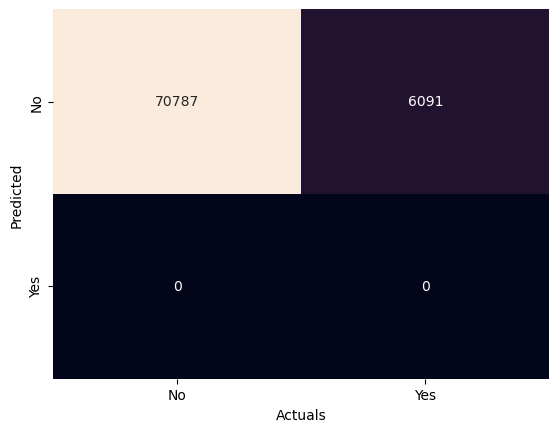

In [43]:
## Confusion Matrix

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat.T, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('Actuals')
plt.ylabel('Predicted')

### Imbalance sample set, up sample of minority class

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

### The Metric Trap
One of the major issues that new developer users fall into when dealing with unbalanced datasets relates to the evaluation metrics used to evaluate their machine learning model.

In [45]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(X_train, y_train)

# predict
xgb_y_predict = xgb_model.predict(X_test)

# accuracy score
xgb_score = accuracy_score(xgb_y_predict, y_test)


In [46]:
print('Accuracy score is:', xgb_score)

Accuracy score is: 0.920393350503395


#### Resampling Techniques to Solve Class Imbalance

In [47]:
# class count
class_count_0, class_count_1 = application_data['TARGET'].value_counts()

# Separate class
class_0 = application_data[application_data['TARGET'] == 0]
class_1 = application_data[application_data['TARGET'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (282686, 155)
class 1: (24825, 155)


#### Random Under-Sampling
Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

total class of 1 and0: 0    24825
1    24825
Name: TARGET, dtype: int64


<Axes: title={'center': 'count (target)'}>

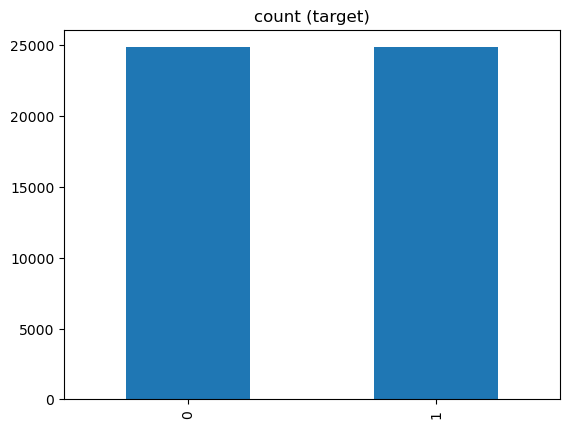

In [48]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",test_under['TARGET'].value_counts())# plot the count after under-sampeling
test_under['TARGET'].value_counts().plot(kind='bar', title='count (target)')

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:

# Separate input features (X) and target variable (y)
y = test_under["TARGET"]
X = test_under.drop('TARGET', axis=1)
 
# Train model
clf_4 = RandomForestClassifier(random_state=123)
clf_4.fit(X, y)
 
# Predict on training set
pred_y_4 = clf_4.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_4) )
# 1.0
 
# What about AUROC?
prob_y_4 = clf_4.predict_proba(X)
prob_y_4 = [p[1] for p in prob_y_4]
print( (y, prob_y_4) )
# 1.0

[0 1]
1.0
(28862     0
96396     0
42068     0
306470    0
4542      0
62446     0
79700     0
7950      0
257198    0
109201    0
14864     0
264565    0
211322    0
26664     0
304874    0
98573     0
17467     0
44425     0
188357    0
138525    0
251394    0
274356    0
230125    0
114435    0
220403    0
36807     0
136699    0
24269     0
100052    0
277779    0
80491     0
211542    0
54666     0
225561    0
271170    0
238465    0
69901     0
186360    0
235957    0
291722    0
276789    0
87862     0
24947     0
164714    0
258977    0
272728    0
36878     0
252273    0
50212     0
2982      0
100525    0
185430    0
34721     0
77069     0
85318     0
167332    0
214807    0
221779    0
270441    0
68290     0
108502    0
217308    0
222364    0
206415    0
30380     0
81130     0
154473    0
87368     0
300978    0
20183     0
116756    0
222278    0
300474    0
280559    0
152107    0
213285    0
295468    0
65734     0
204453    0
235841    0
291730    0
270810    0
25881

Text(50.722222222222214, 0.5, 'Predicted')

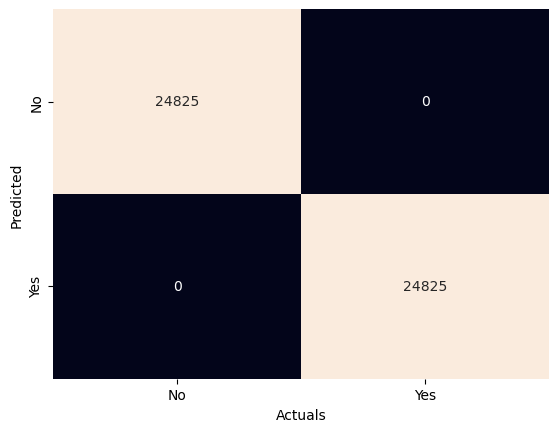

In [51]:
## Confusion Matrix

conf_mat = confusion_matrix(y, pred_y_4)
sns.heatmap(conf_mat.T, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('Actuals')
plt.ylabel('Predicted')

### Get and plot features importances

In [52]:
# Creating the feature importances dataframe
feature_importance = np.array(rf_classifier.feature_importances_)
feature_names = np.array(X.columns)

feat_imp = pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance})

<Axes: xlabel='feature_importance', ylabel='feature_names'>

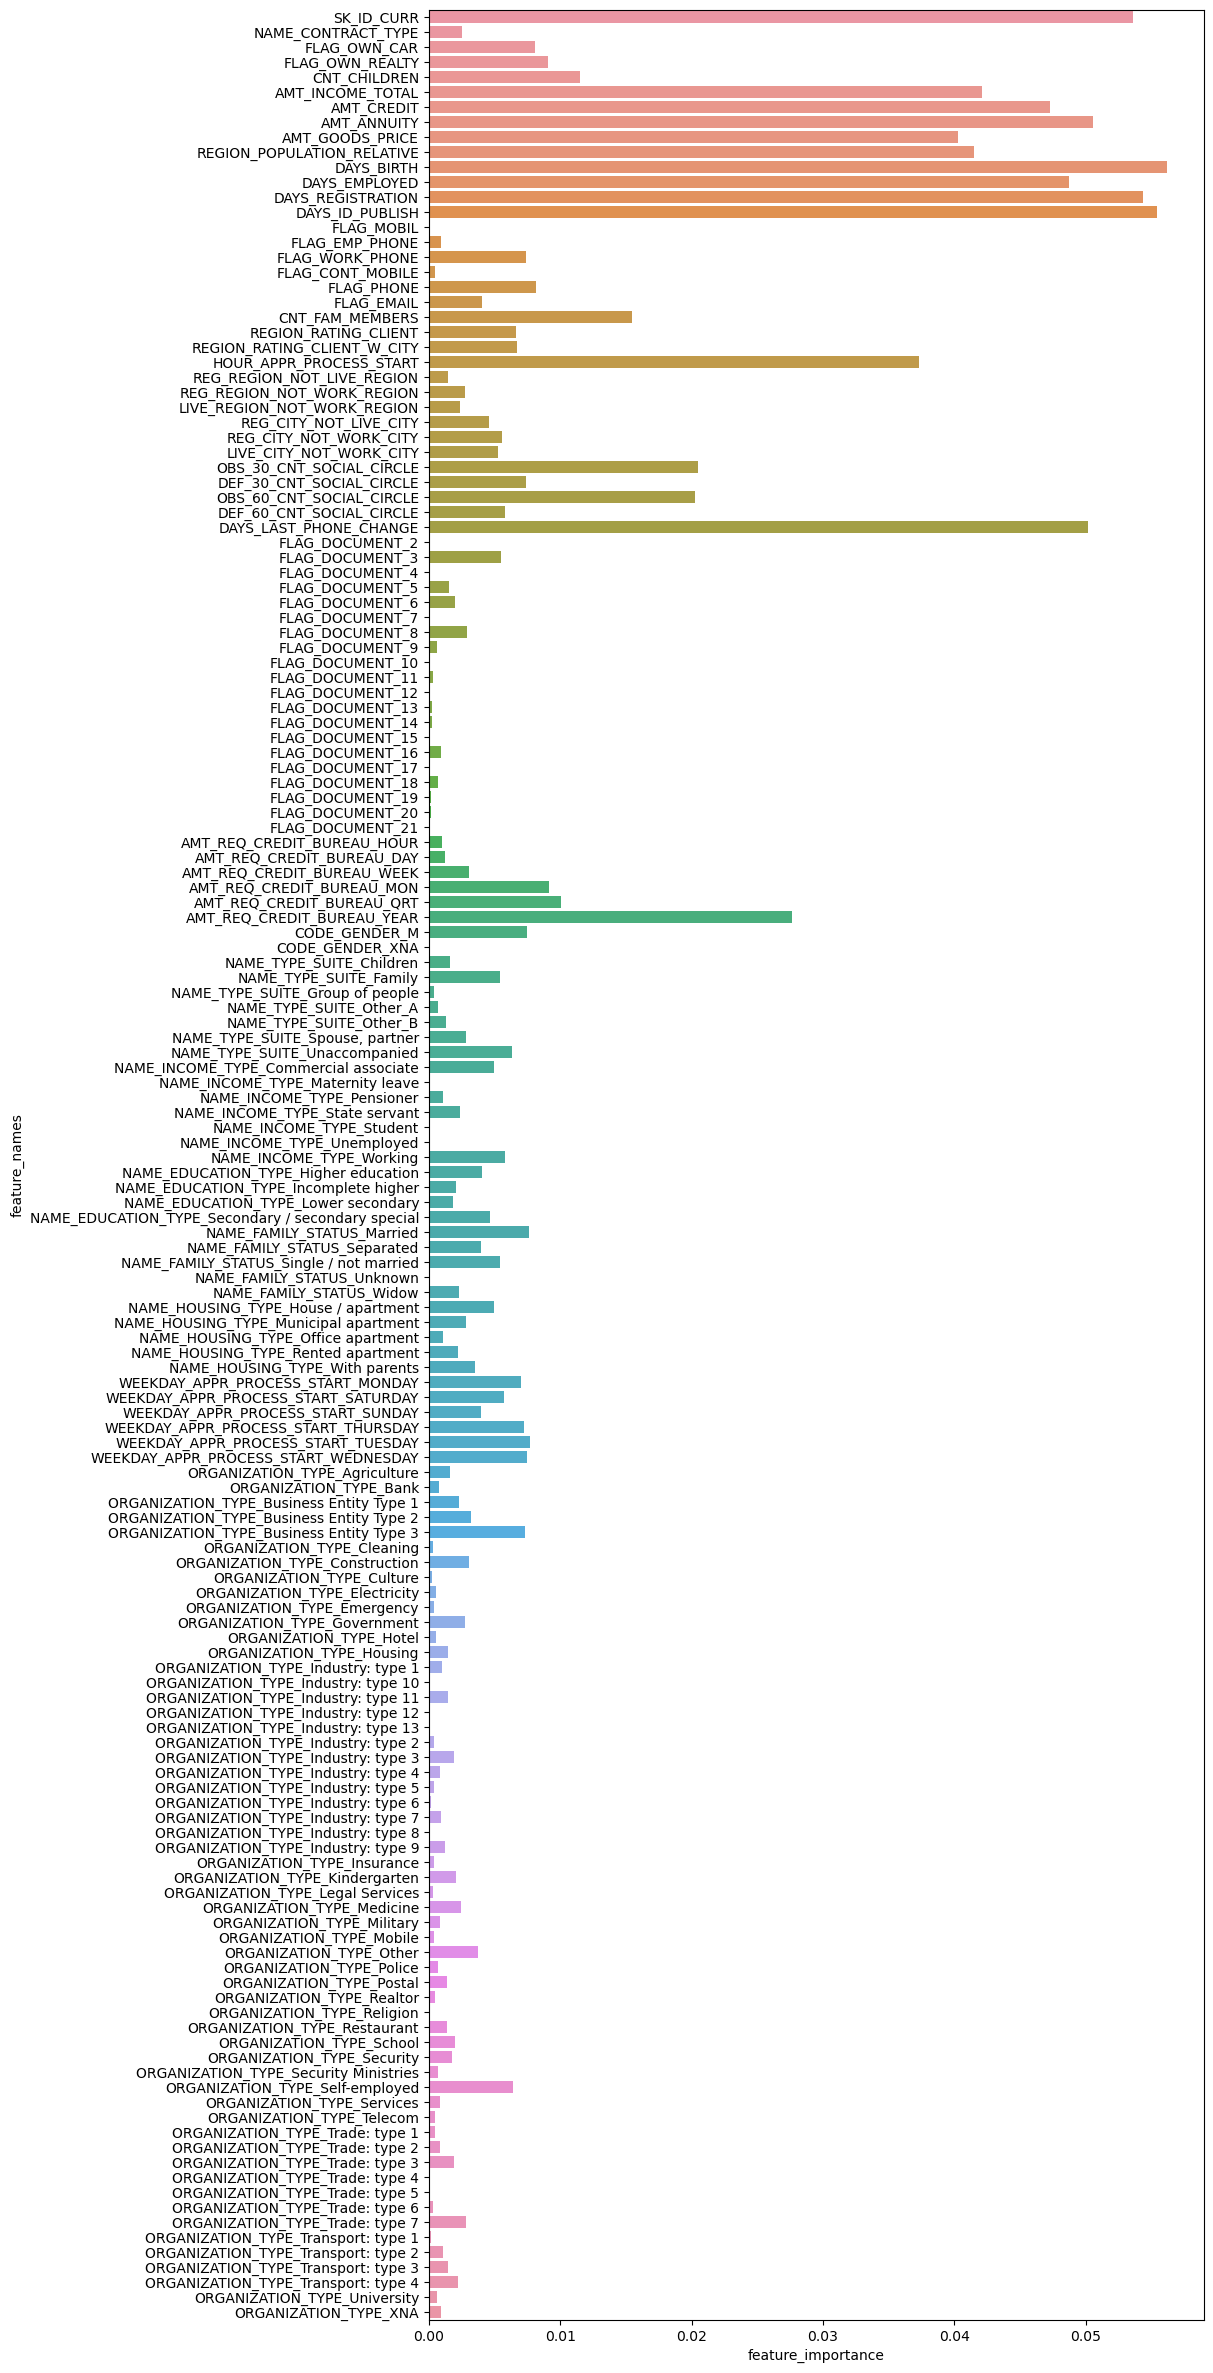

In [53]:
plt.figure(figsize=(10,30))
sns.barplot(x=feat_imp['feature_importance'], y=feat_imp['feature_names'])